In [45]:
#### FIRST IMPORTS ####
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
#### SKLEARN ####
#!pip install -U scikit-learn
import sklearn 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#### READING DATASET ####
terr_df = pd.read_csv("globalterrorismdb_shorter.csv", encoding='latin-1')
#### RESOLVING ERROR ####
# encoding = 'latin-1' is useful to fix the issue we get when we import the dataset
# The error was : "'utf-8' codec can't decode byte 0xe1 in position 5: invalid continuation byte"
#### CONCERNED DATASET #### 
# https://www.kaggle.com/northon/globalterrorismdatabase-compact

In [105]:
''' MAIN COLUMNS DESCRIPTION 
- eventid: A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential 
- iyear, imonth, iday: year, month and day of the incident
- country: country id
- country_txt: country where the incident occured
- nkill: number of killed people in the incident
- weaptype1: weapon id
- weaptype1_txt: weapon name
'''

' MAIN COLUMNS DESCRIPTION \n- eventid: A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential \n- iyear, imonth, iday: year, month and day of the incident\n- country: country id\n- country_txt: country where the incident occured\n- nkill: number of killed people in the incident\n- weaptype1: weapon id\n- weaptype1_txt: weapon name\n'

In [14]:
terr_df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
location             object
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             int64
alternative         float64
alternative_txt      object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt         

In [87]:
#### DATETYPE ####
terr_df['iyear'] = pd.to_datetime(terr_df['iyear'])
print(terr_df['iyear'])

0        1970-01-01 00:00:00.000001970
1        1970-01-01 00:00:00.000001970
2        1970-01-01 00:00:00.000001970
3        1970-01-01 00:00:00.000001970
4        1970-01-01 00:00:00.000001970
                      ...             
170345   1970-01-01 00:00:00.000002016
170346   1970-01-01 00:00:00.000002016
170347   1970-01-01 00:00:00.000002016
170348   1970-01-01 00:00:00.000002016
170349   1970-01-01 00:00:00.000002016
Name: iyear, Length: 170350, dtype: datetime64[ns]


In [88]:
terr_df.dtypes

eventid                      int64
iyear               datetime64[ns]
imonth                       int64
iday                         int64
extended                     int64
country                      int64
country_txt                 object
region                       int64
region_txt                  object
provstate                   object
city                        object
latitude                   float64
longitude                  float64
specificity                float64
vicinity                     int64
location                    object
summary                     object
crit1                        int64
crit2                        int64
crit3                        int64
doubtterr                    int64
alternative                float64
alternative_txt             object
multiple                     int64
success                      int64
suicide                      int64
attacktype1                  int64
attacktype1_txt             object
targtype1           

In [16]:
terr_df.head()

eventid  iyear  imonth  iday  extended  country         country_txt  \
0  197000000001   1970       7     2         0       58  Dominican Republic   
1  197000000002   1970       0     0         0      130              Mexico   
2  197001000001   1970       1     0         0      160         Philippines   
3  197001000002   1970       1     0         0       78              Greece   
4  197001000003   1970       1     0         0      101               Japan   

   region                   region_txt provstate  ... nkill  nkillter  nwound  \
0       2  Central America & Caribbean       NaN  ...   1.0       NaN     0.0   
1       1                North America       NaN  ...   0.0       NaN     0.0   
2       5               Southeast Asia    Tarlac  ...   1.0       NaN     0.0   
3       8               Western Europe    Attica  ...   NaN       NaN     NaN   
4       4                    East Asia       NaN  ...   NaN       NaN     NaN   

   nwoundte  property propextent propextent_txt  ishostkid  nhostkid  dbsource  
0       NaN         0        NaN            NaN        0.0       NaN      PGIS  
1       NaN         0        NaN            NaN        1.0       1.0      PGIS  
2       NaN         0        NaN            NaN        0.0       NaN      PGIS  
3       NaN         1        NaN            NaN        0.0       NaN      PGIS  
4       NaN         1        NaN            NaN        0.0       NaN      PGIS  

[5 rows x 58 columns]

In [76]:
terr_df.tail(5)

eventid  iyear  imonth  iday  extended  country  \
170345  201612310040   2016      12    31         0      146   
170346  201612310042   2016      12    31         0      160   
170347  201612310043   2016      12    31         1      229   
170348  201612310044   2016      12    31         0      130   
170349  201701270001   2016      12    30         0      195   

                             country_txt  region          region_txt  \
170345                             Niger      11  Sub-Saharan Africa   
170346                       Philippines       5      Southeast Asia   
170347  Democratic Republic of the Congo      11  Sub-Saharan Africa   
170348                            Mexico       1       North America   
170349                             Sudan      11  Sub-Saharan Africa   

             provstate  ... nkill  nkillter  nwound  nwoundte  property  \
170345           Diffa  ...  15.0      12.0     7.0       0.0         0   
170346     Maguindanao  ...   0.0       0.0     0.0       0.0        -9   
170347        Bas-Uele  ...   0.0       0.0     NaN       0.0         0   
170348       Chihuahua  ...   0.0       0.0     0.0       0.0         1   
170349  Central Darfur  ...   0.0       0.0     0.0       0.0         0   

       propextent               propextent_txt  ishostkid  nhostkid  \
170345        NaN                          NaN        0.0       NaN   
170346        NaN                          NaN        0.0       NaN   
170347        NaN                          NaN        1.0      33.0   
170348        3.0  Minor (likely < $1 million)        0.0       NaN   
170349        NaN                          NaN        0.0       NaN   

                        dbsource  
170345  START Primary Collection  
170346  START Primary Collection  
170347  START Primary Collection  
170348  START Primary Collection  
170349  START Primary Collection  

[5 rows x 58 columns]

In [89]:
terr_df.shape
# lines and columns

(170350, 58)

In [32]:
#### FIRST DELETING USELESS COLUMNS ####
# We're deleting the columns we won't/can't use in a data analysis
first_clean_terr = terr_df.drop(columns = ['extended', 'provstate', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple'])
first_clean_terr.head(20)

eventid  iyear  imonth  iday  country         country_txt  region  \
0   197000000001   1970       7     2       58  Dominican Republic       2   
1   197000000002   1970       0     0      130              Mexico       1   
2   197001000001   1970       1     0      160         Philippines       5   
3   197001000002   1970       1     0       78              Greece       8   
4   197001000003   1970       1     0      101               Japan       4   
5   197001010002   1970       1     1      217       United States       1   
6   197001020001   1970       1     2      218             Uruguay       3   
7   197001020002   1970       1     2      217       United States       1   
8   197001020003   1970       1     2      217       United States       1   
9   197001030001   1970       1     3      217       United States       1   
10  197001050001   1970       1     1      217       United States       1   
11  197001060001   1970       1     6      217       United States       1   
12  197001080001   1970       1     8       98               Italy       8   
13  197001090001   1970       1     9      217       United States       1   
14  197001090002   1970       1     9      217       United States       1   
15  197001100001   1970       1    10      499  East Germany (GDR)       9   
16  197001110001   1970       1    11       65            Ethiopia      11   
17  197001120001   1970       1    12      217       United States       1   
18  197001120002   1970       1    12      217       United States       1   
19  197001130001   1970       1    13      217       United States       1   

                     region_txt           city             alternative_txt  \
0   Central America & Caribbean  Santo Domingo                         NaN   
1                 North America    Mexico city                         NaN   
2                Southeast Asia        Unknown                         NaN   
3                Western Europe         Athens                         NaN   
4                     East Asia        Fukouka                         NaN   
5                 North America          Cairo                         NaN   
6                 South America     Montevideo                         NaN   
7                 North America        Oakland            Other Crime Type   
8                 North America        Madison                         NaN   
9                 North America        Madison                         NaN   
10                North America        Baraboo  Insurgency/Guerilla Action   
11                North America         Denver            Other Crime Type   
12               Western Europe           Rome                         NaN   
13                North America        Detroit                         NaN   
14                North America    Rio Piedras            Other Crime Type   
15               Eastern Europe    East Berlin                         NaN   
16           Sub-Saharan Africa        Unknown  Insurgency/Guerilla Action   
17                North America  New York City                         NaN   
18                North America     Rio Grande                         NaN   
19                North America        Seattle                         NaN   

    ...  nkill  nkillter  nwound nwoundte  property propextent  \
0   ...    1.0       NaN     0.0      NaN         0        NaN   
1   ...    0.0       NaN     0.0      NaN         0        NaN   
2   ...    1.0       NaN     0.0      NaN         0        NaN   
3   ...    NaN       NaN     NaN      NaN         1        NaN   
4   ...    NaN       NaN     NaN      NaN         1        NaN   
5   ...    0.0       0.0     0.0      0.0         1        3.0   
6   ...    0.0       NaN     0.0      NaN         0        NaN   
7   ...    0.0       0.0     0.0      0.0         1        3.0   
8   ...    0.0       0.0     0.0      0.0         1        3.0   
9   ...    0.0       0.0     0.0      0.0         1        3.0   
10  .

In [85]:
#### SECOND DELETING USELESS COLUMNS ####
# We're deleting the columns we won't/can't use in a data 
clean_terr = first_clean_terr.drop(columns = ['guncertain1', 'individual', 'nperpcap', 'claimed', 'weapsubtype1', 'weapsubtype1_txt', 'nkillter', 'nwound', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'ishostkid', 'nhostkid', ])
clean_terr.head(20)

eventid  iyear  imonth  iday  country         country_txt  region  \
0   197000000001   1970       7     2       58  Dominican Republic       2   
1   197000000002   1970       0     0      130              Mexico       1   
2   197001000001   1970       1     0      160         Philippines       5   
3   197001000002   1970       1     0       78              Greece       8   
4   197001000003   1970       1     0      101               Japan       4   
5   197001010002   1970       1     1      217       United States       1   
6   197001020001   1970       1     2      218             Uruguay       3   
7   197001020002   1970       1     2      217       United States       1   
8   197001020003   1970       1     2      217       United States       1   
9   197001030001   1970       1     3      217       United States       1   
10  197001050001   1970       1     1      217       United States       1   
11  197001060001   1970       1     6      217       United States       1   
12  197001080001   1970       1     8       98               Italy       8   
13  197001090001   1970       1     9      217       United States       1   
14  197001090002   1970       1     9      217       United States       1   
15  197001100001   1970       1    10      499  East Germany (GDR)       9   
16  197001110001   1970       1    11       65            Ethiopia      11   
17  197001120001   1970       1    12      217       United States       1   
18  197001120002   1970       1    12      217       United States       1   
19  197001130001   1970       1    13      217       United States       1   

                     region_txt           city             alternative_txt  \
0   Central America & Caribbean  Santo Domingo                         NaN   
1                 North America    Mexico city                         NaN   
2                Southeast Asia        Unknown                         NaN   
3                Western Europe         Athens                         NaN   
4                     East Asia        Fukouka                         NaN   
5                 North America          Cairo                         NaN   
6                 South America     Montevideo                         NaN   
7                 North America        Oakland            Other Crime Type   
8                 North America        Madison                         NaN   
9                 North America        Madison                         NaN   
10                North America        Baraboo  Insurgency/Guerilla Action   
11                North America         Denver            Other Crime Type   
12               Western Europe           Rome                         NaN   
13                North America        Detroit                         NaN   
14                North America    Rio Piedras            Other Crime Type   
15               Eastern Europe    East Berlin                         NaN   
16           Sub-Saharan Africa        Unknown  Insurgency/Guerilla Action   
17                North America  New York City                         NaN   
18                North America     Rio Grande                         NaN   
19                North America        Seattle                         NaN   

    ...  natlty1         natlty1_txt                               gname  \
0   ...     58.0  Dominican Republic                              MANO-D   
1   ...     21.0             Belgium  23rd of September Communist League   
2   ...    217.0       United States                             Unknown   
3   ...    217.0       United States                             Unknown   
4   ...    217.0       United States                             Unknown   
5   ...    217.0       United States                  Black Nationalists   
6   ...    218.0             Uruguay                 Tupamaros (Uruguay)   
7   ...    217.0       United States                             Unknown   
8   ...    217.0       United States           

In [41]:
#### IS THERE A LINK BETWEEN THE WEAPON TYPE AND THE COUNTRY 
#### OR A LINK BETWEEN THE YEAR AND THE COUNTRY ? ####

In [42]:
#### CHECKING DUPLICATE ####
clean_terr.duplicated(subset = ['eventid']).sum()

0

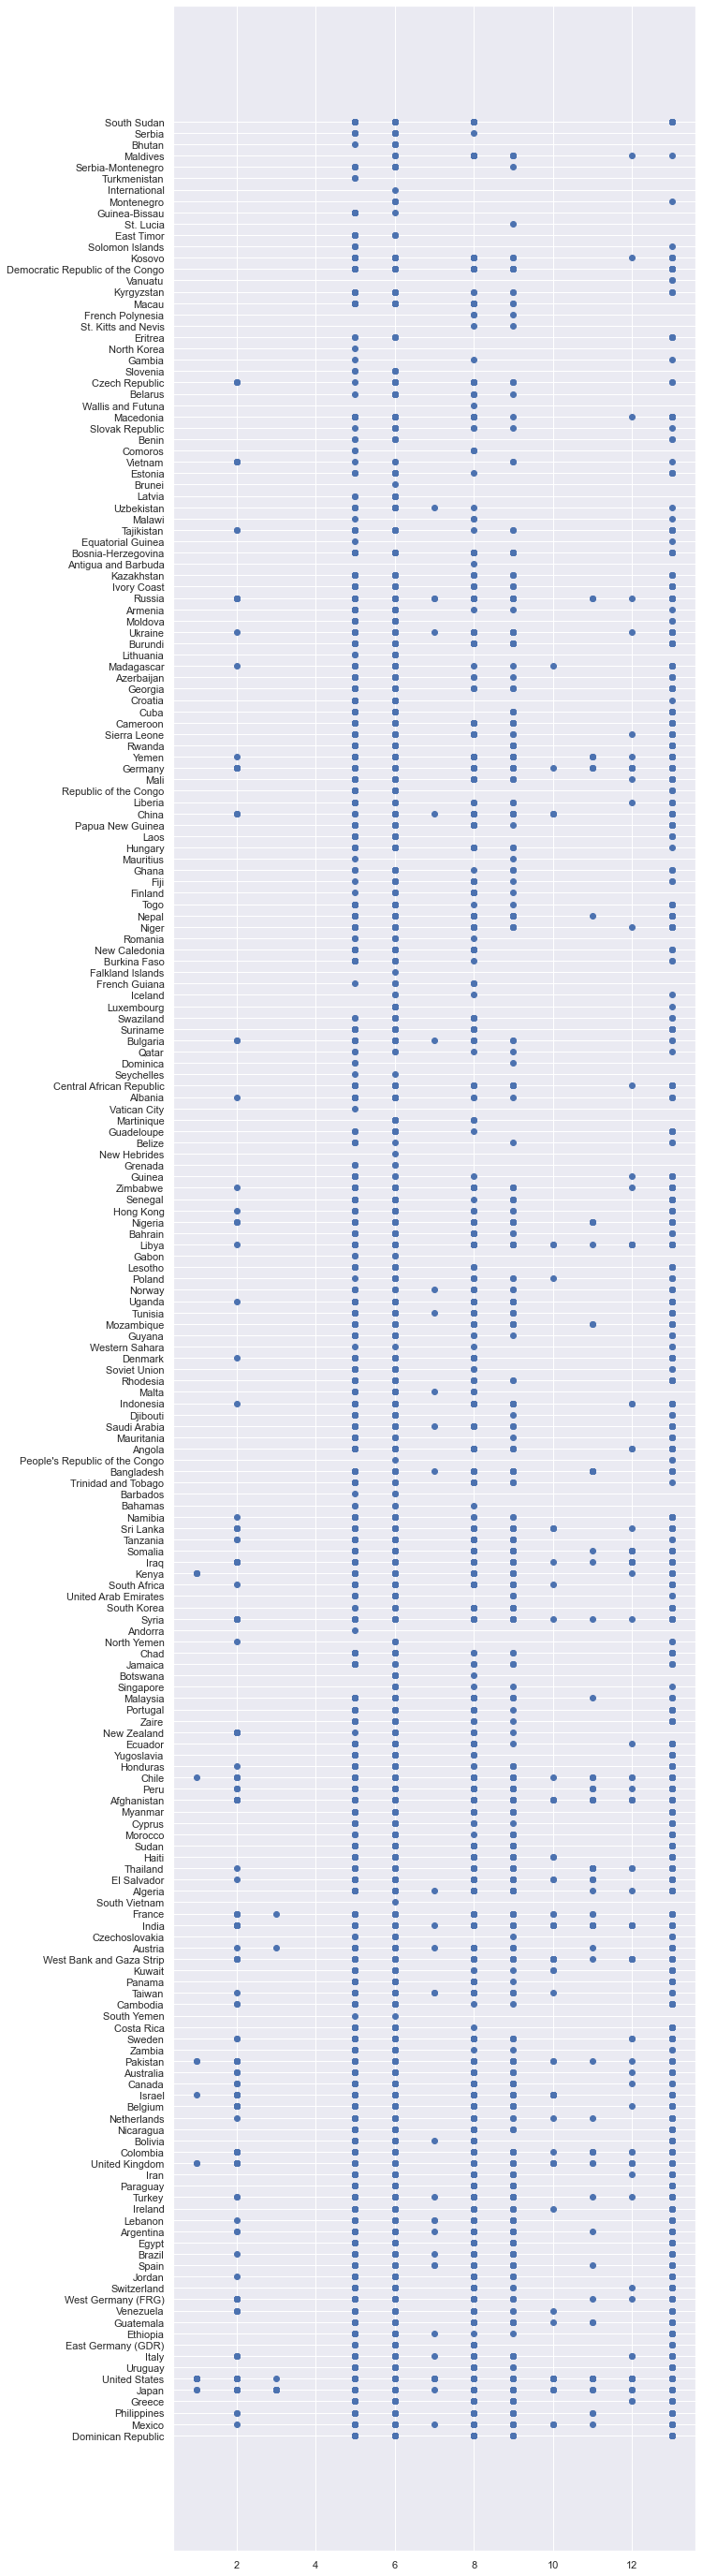

In [52]:
#### WEAPON TYPE AND COUNTRY ####
matplotlib.pyplot.figure(figsize=(10,50))
clean_terr_d = plt.matplotlib.pyplot.scatter(clean_terr['weaptype1'], clean_terr['country_txt'])

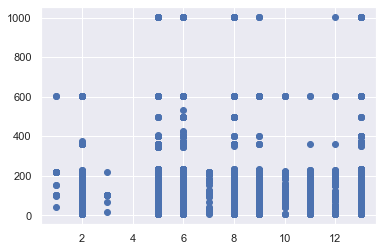

In [67]:
clean_terr_d = plt.matplotlib.pyplot.scatter(clean_terr['weaptype1'], clean_terr['country'])
# In this version, it doesn't mean a lot
# we just know that the most used weapons are 5, 6, 8, 9, 12 and 13

In [70]:
weapon = pd.DataFrame(clean_terr,columns=['weaptype1','weaptype1_txt'])
weapon

weaptype1              weaptype1_txt
0              13                    Unknown
1              13                    Unknown
2              13                    Unknown
3               6  Explosives/Bombs/Dynamite
4               8                 Incendiary
...           ...                        ...
170345         13                    Unknown
170346          6  Explosives/Bombs/Dynamite
170347         13                    Unknown
170348          5                   Firearms
170349          5                   Firearms

[170350 rows x 2 columns]

In [73]:
#### YEAR AND COUNTRY ####
matplotlib.pyplot.figure(figsize=(10,50))
clean_terr_d2 = plt.matplotlib.pyplot.scatter(clean_terr['iyear'], clean_terr['country_txt'])

In [74]:
# We can see the countries where there are terrorist attacks between 1970 and 2016 
# such as Dominican Republic, Mexico.. etc
# But we also see some countries where there aren't a lot of terrorist attacks:
# Only since a few years, like South Sudan, or Serbia.

In [80]:
#### BOXPLOTS ####

In [86]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['iyear', 'nkill'], start=1):
    plt.subplot(2, 3, i)
    clean_terr.boxplot(col)

In [91]:
#### LINEAR REGRESSION ####
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [93]:
#### VARIABLES X AND Y #### 
X = clean_terr[['iyear', 'weaptype1']]
Y = clean_terr['country']

In [95]:
#### TRAIN TEST SPLIT ####
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [96]:
X_train.head()

iyear  weaptype1
110069   2012          6
72355    2001          5
34966    1988          6
21873    1984          5
164151   2016          6

In [97]:
Y_train.head()

110069      4
72355      49
34966      92
21873     145
164151     96
Name: country, dtype: int64

In [98]:
lr.fit(X_train, Y_train)
lr

LinearRegression()

In [99]:
lr.coef_

array([-1.19695856, -1.45401366])

In [100]:
lr.intercept_

2537.6419145171576

In [102]:
lr.predict(X_test)

array([115.84937679, 119.44025247, 137.65168596, ..., 120.63721103,
       123.03112815, 151.75813357])

In [103]:
lr.score(X_test, Y_test)*100

1.884776883602135

In [101]:
# I tried to understand these last values by checking on internet what a negative lr could mean
# but I didn't really get the point

In [106]:
#### HEATMAP #### 

In [126]:
# defining index for the dataframe 
idx = ['1', '2', '3', '4'] 
  
# defining columns for the dataframe 
cols = list('ABCD') 

clean_terr = pd.DataFrame([[1970, 1980, 1990, 2000]],columns = cols, index = idx) 

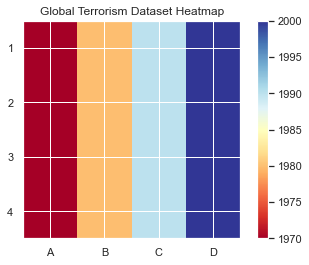

In [128]:
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlBu 
plt.imshow(clean_terr, cmap ="RdYlBu") 
  
# Displaying a color bar to understand 
# which color represents which range of data 
plt.colorbar() 
  
# Assigning labels of x-axis  
# according to dataframe 
plt.xticks(range(len(clean_terr)), clean_terr.columns) 
  
# Assigning labels of y-axis  
# according to dataframe 
plt.yticks(range(len(clean_terr)), clean_terr.index) 
  
# Displaying the figure 
plt.title('Global Terrorism Dataset Heatmap')
plt.show() 

# I didn't understand how to do the heatmap
# but I tried 